In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)
from sklearn.svm import LinearSVC

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, regularizers


np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# Load 20 Newsgroups dataset

newsgroups = fetch_20newsgroups(
    subset='all',
    remove=('headers', 'footers', 'quotes')
)

X = newsgroups.data
y = newsgroups.target
target_names = newsgroups.target_names

print("Number of documents:", len(X))
print("Number of classes:", len(target_names))
print("Sample classes:", target_names[:5])

Number of documents: 18846
Number of classes: 20
Sample classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']


In [3]:
# Examine a few sample documents

for i in range(3):
    print("====================================")
    print(f"Document {i}")
    print("Class:", target_names[y[i]])
    print("Text snippet:")
    print(X[i][:500].replace("\n", " "))
    print()

Document 0
Class: rec.sport.hockey
Text snippet:
  I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am  bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his regular season stats. He is also a lot fo fun to watch in the playoffs. Bowman should let JAgr have a

Document 1
Class: comp.sys.ibm.pc.hardware
Text snippet:
My brother is in the market for a high-performance video card that supports VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:    - Diamond Stealth Pro Local Bus    - Orchid Farenheit 1280    - ATI Graphics Ultra Pro    - Any other high-performance VLB card   Please post or email.  Thank you!    - Matt 

Document 2
Class: talk.politics.mideast
Text snippet:
    	Finally

In [4]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))

Train size: 15076
Test size : 3770


# SVM Model

In [41]:
# TF-IDF vectorization for SVM

max_features = 20000

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=max_features
)

print("Fitting TF-IDF vectorizer...")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape :", X_test_tfidf.shape)

Fitting TF-IDF vectorizer...
TF-IDF train shape: (15076, 20000)
TF-IDF test shape : (3770, 20000)


In [42]:
'vocabulary_' in vectorizer.__dict__

True

In [43]:
len(vectorizer.vocabulary_)

20000

In [44]:

with open(r"C:\Users\dkast\ANA 680\Final\vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [6]:
# Build SVM model

svm_clf = LinearSVC(C=1.0, random_state=42)

In [7]:
# Train SVM model

print("Training Linear SVM...")
svm_clf.fit(X_train_tfidf, y_train)
print("Training completed.")

Training Linear SVM...
Training completed.


In [8]:
# SVM predictions

svm_preds = svm_clf.predict(X_test_tfidf)

In [9]:
# Check SVM accuracy on training and test sets

svm_train_preds = svm_clf.predict(X_train_tfidf)
svm_train_acc = accuracy_score(y_train, svm_train_preds)
svm_test_acc = accuracy_score(y_test, svm_preds)

print("====================================")
print(f"SVM Training Accuracy: {svm_train_acc:.4f}")
print(f"SVM Test Accuracy:     {svm_test_acc:.4f}")
print("====================================")

SVM Training Accuracy: 0.9680
SVM Test Accuracy:     0.7507


In [10]:
# SVM classification report

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds, target_names=target_names))


SVM Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.68      0.59      0.63       160
           comp.graphics       0.79      0.74      0.77       195
 comp.os.ms-windows.misc       0.69      0.71      0.70       197
comp.sys.ibm.pc.hardware       0.65      0.67      0.66       196
   comp.sys.mac.hardware       0.78      0.72      0.75       193
          comp.windows.x       0.85      0.86      0.85       198
            misc.forsale       0.78      0.73      0.75       195
               rec.autos       0.51      0.83      0.63       198
         rec.motorcycles       0.80      0.71      0.76       199
      rec.sport.baseball       0.85      0.82      0.84       199
        rec.sport.hockey       0.93      0.88      0.90       200
               sci.crypt       0.85      0.84      0.84       198
         sci.electronics       0.75      0.75      0.75       197
                 sci.med       0.82      0.80  

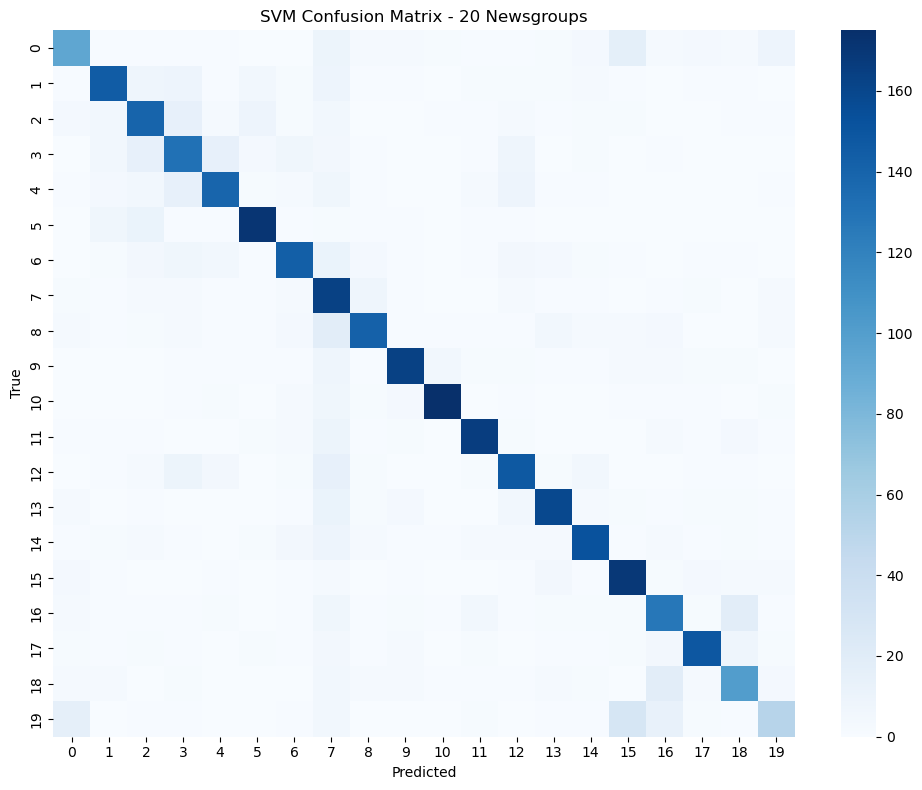

In [11]:
# SVM confusion matrix

svm_cm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(svm_cm, cmap="Blues", cbar=True)
plt.title("SVM Confusion Matrix - 20 Newsgroups")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [12]:
# Sample predictions from SVM

print("\nSample Predictions from SVM:\n")
for i in range(5):
    print("-----")
    print(f"Document {i}:")
    print("TEXT:", X_test[i][:500].replace("\n", " "))
    print("True label:     ", target_names[y_test[i]])
    print("Predicted label:", target_names[svm_preds[i]])
    print()


Sample Predictions from SVM:

-----
Document 0:
TEXT:   Can You report CRT and other register state in this mode ?  Thank's.
True label:      comp.graphics
Predicted label: talk.politics.misc

-----
Document 1:
TEXT: Just to remark that I have heard that David Koresh has risen from  the dead.  I dont know if it is true or not, but this is what I have been told.  What do you guys think?
True label:      talk.religion.misc
Predicted label: rec.autos

-----
Document 2:
TEXT: I've spent the past week tearing my hair out, trying to get the output of a piped "tail -f" to end up in a widget.  I've managed to make it work in some ugly ways, but either a) X blocks on the tail and won't allow user input, b) the "tail -f" functions like just "tail" and doesn't follow the expansion of the file, c) the "tail -f" doesn't die after I've closed the pipe and destoryed the widget, or d) pclose() blocks forever waiting for tail to die. 	I _know_ this code has to exist.  Anybody hav
True label:      comp

# CNN Model

In [13]:
# Tokenization and padding for CNN models

max_words = 20000
max_len = 300

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

print("Padded train shape:", X_train_pad.shape)
print("Padded test shape :", X_test_pad.shape)

Padded train shape: (15076, 300)
Padded test shape : (3770, 300)


In [14]:
# Build baseline CNN model 

embedding_dim_baseline = 128
num_classes = len(target_names)

cnn_model_baseline = models.Sequential([
    layers.Input(shape=(max_len,)),
    layers.Embedding(max_words, embedding_dim_baseline),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model_baseline.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

In [15]:
# CNN Model Summary

cnn_model_baseline.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 296, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,661,140 (10.15 MB)

 Trainable params: 2,661,140 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train baseline CNN model 

baseline_history = cnn_model_baseline.fit(
    X_train_pad,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=2
)

Epoch 1/10
212/212 - 26s - 121ms/step - accuracy: 0.1124 - loss: 2.8979 - val_accuracy: 0.3282 - val_loss: 2.4481
Epoch 2/10
212/212 - 23s - 110ms/step - accuracy: 0.4490 - loss: 1.8290 - val_accuracy: 0.5962 - val_loss: 1.3742
Epoch 3/10
212/212 - 23s - 107ms/step - accuracy: 0.6610 - loss: 1.1101 - val_accuracy: 0.6684 - val_loss: 1.1506
Epoch 4/10
212/212 - 23s - 110ms/step - accuracy: 0.7862 - loss: 0.7035 - val_accuracy: 0.6824 - val_loss: 1.0957
Epoch 5/10
212/212 - 23s - 108ms/step - accuracy: 0.8757 - loss: 0.4352 - val_accuracy: 0.6963 - val_loss: 1.1316
Epoch 6/10
212/212 - 43s - 201ms/step - accuracy: 0.9249 - loss: 0.2780 - val_accuracy: 0.6936 - val_loss: 1.2267
Epoch 7/10
212/212 - 24s - 114ms/step - accuracy: 0.9509 - loss: 0.1921 - val_accuracy: 0.6910 - val_loss: 1.2986
Epoch 8/10
212/212 - 24s - 112ms/step - accuracy: 0.9609 - loss: 0.1521 - val_accuracy: 0.6950 - val_loss: 1.3693
Epoch 9/10
212/212 - 23s - 108ms/step - accuracy: 0.9649 - loss: 0.1302 - val_accuracy: 

In [17]:
# Baseline CNN predictions

baseline_probs = cnn_model_baseline.predict(X_test_pad, verbose=0)
baseline_preds = np.argmax(baseline_probs, axis=1)

In [18]:
# Baseline CNN accuracy on training and test sets

baseline_train_probs = cnn_model_baseline.predict(X_train_pad, verbose=0)
baseline_train_preds = np.argmax(baseline_train_probs, axis=1)

baseline_train_acc = accuracy_score(y_train, baseline_train_preds)
baseline_test_acc = accuracy_score(y_test, baseline_preds)

cnn_test_acc_baseline = baseline_test_acc  # Save for comparison

print("====================================")
print("Baseline CNN Performance")
print("====================================")
print(f"Baseline CNN Training Accuracy: {baseline_train_acc:.4f}")
print(f"Baseline CNN Test Accuracy:     {baseline_test_acc:.4f}")
print("====================================")

Baseline CNN Performance
Baseline CNN Training Accuracy: 0.9460
Baseline CNN Test Accuracy:     0.6828


In [19]:
# Baseline CNN classification report

print("\nBaseline CNN Classification Report:")
print(classification_report(y_test, baseline_preds, target_names=target_names))


Baseline CNN Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.54      0.54       160
           comp.graphics       0.73      0.69      0.71       195
 comp.os.ms-windows.misc       0.68      0.71      0.69       197
comp.sys.ibm.pc.hardware       0.63      0.64      0.64       196
   comp.sys.mac.hardware       0.80      0.65      0.72       193
          comp.windows.x       0.87      0.81      0.84       198
            misc.forsale       0.77      0.68      0.72       195
               rec.autos       0.43      0.78      0.56       198
         rec.motorcycles       0.80      0.57      0.66       199
      rec.sport.baseball       0.79      0.80      0.80       199
        rec.sport.hockey       0.93      0.81      0.87       200
               sci.crypt       0.80      0.78      0.79       198
         sci.electronics       0.53      0.63      0.58       197
                 sci.med       0.78   

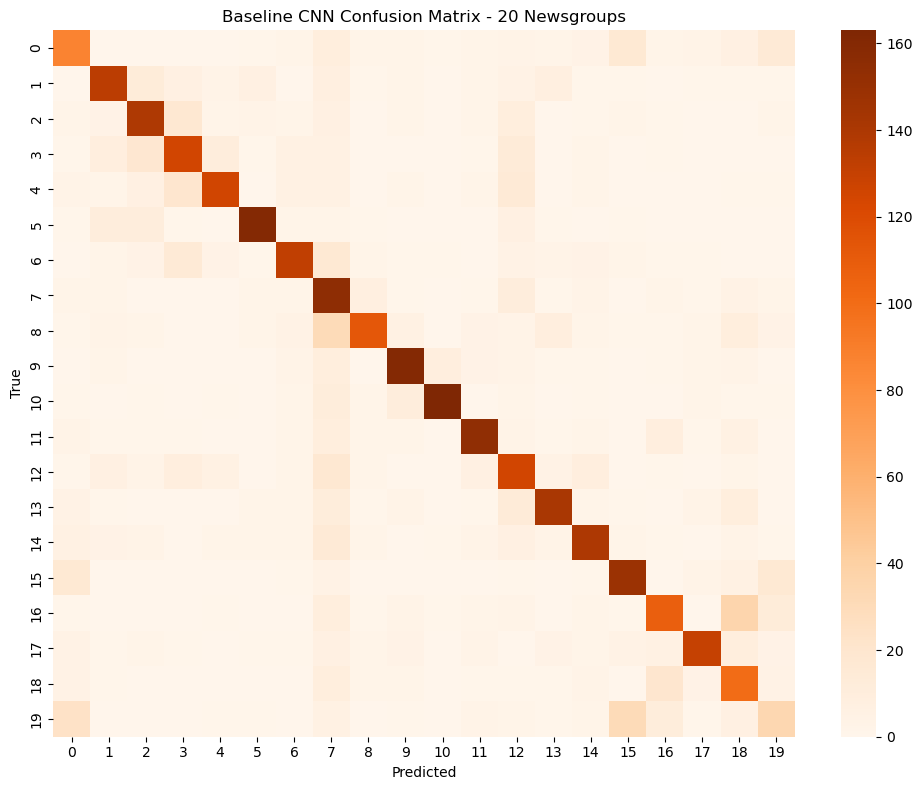

In [20]:
# Baseline CNN confusion matrix

baseline_cm = confusion_matrix(y_test, baseline_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(baseline_cm, cmap="Oranges", cbar=True)
plt.title("Baseline CNN Confusion Matrix - 20 Newsgroups")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

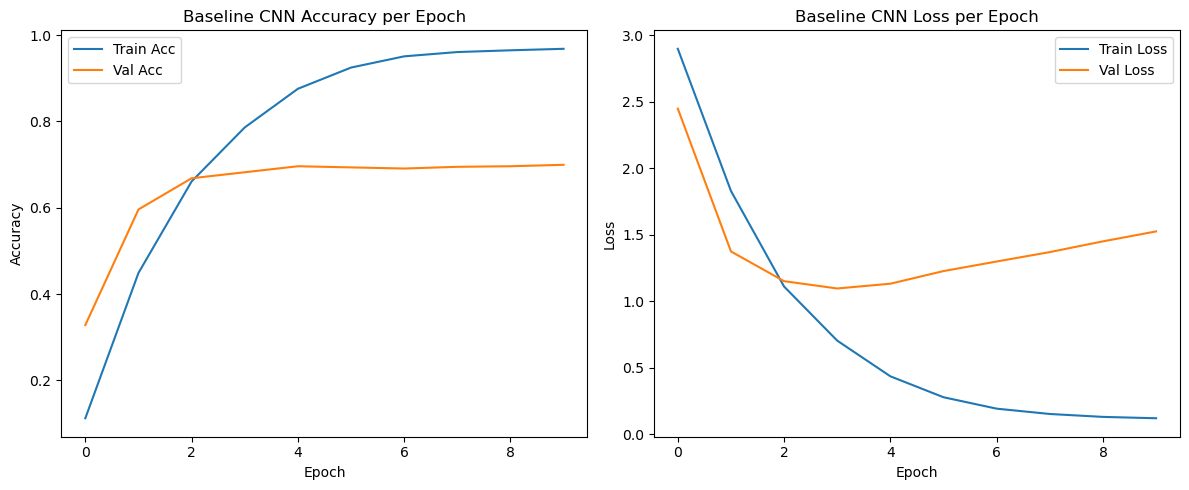

In [21]:
# Baseline CNN training curves (shows overfitting)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Train Acc')
plt.plot(baseline_history.history['val_accuracy'], label='Val Acc')
plt.title("Baseline CNN Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Val Loss')
plt.title("Baseline CNN Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Sample predictions from Baseline CNN

print("\nSample Predictions from Baseline CNN:\n")
for i in range(5):
    print("-----")
    print(f"Document {i}:")
    print("TEXT:", X_test[i][:500].replace("\n", " "))
    print("True label:     ", target_names[y_test[i]])
    print("Predicted label:", target_names[baseline_preds[i]])
    print()


Sample Predictions from Baseline CNN:

-----
Document 0:
TEXT:   Can You report CRT and other register state in this mode ?  Thank's.
True label:      comp.graphics
Predicted label: sci.crypt

-----
Document 1:
TEXT: Just to remark that I have heard that David Koresh has risen from  the dead.  I dont know if it is true or not, but this is what I have been told.  What do you guys think?
True label:      talk.religion.misc
Predicted label: talk.politics.guns

-----
Document 2:
TEXT: I've spent the past week tearing my hair out, trying to get the output of a piped "tail -f" to end up in a widget.  I've managed to make it work in some ugly ways, but either a) X blocks on the tail and won't allow user input, b) the "tail -f" functions like just "tail" and doesn't follow the expansion of the file, c) the "tail -f" doesn't die after I've closed the pipe and destoryed the widget, or d) pclose() blocks forever waiting for tail to die. 	I _know_ this code has to exist.  Anybody hav
True label: 

In [23]:
# Build tuned CNN model (regularized to reduce overfitting)

embedding_dim_tuned = 128

cnn_model_tuned = models.Sequential([
    layers.Input(shape=(max_len,)),
    layers.Embedding(max_words, embedding_dim_tuned),

    layers.Conv1D(
        128, 5, activation='relu',
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    layers.Dropout(0.3),
    layers.GlobalMaxPooling1D(),

    layers.Dense(
        128, activation='relu',
        kernel_regularizer=regularizers.l2(1e-4)
    ),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

cnn_model_tuned.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

In [24]:
# Tuned CNN Model Summary

cnn_model_tuned.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 296, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 296, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,661,140 (10.15 MB)

 Trainable params: 2,661,140 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Callbacks for tuned CNN

callbacks_tuned = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=1,
        min_lr=1e-5,
        verbose=1
    )
]

In [26]:
# Train tuned CNN model

tuned_history = cnn_model_tuned.fit(
    X_train_pad,
    y_train,
    validation_split=0.1,
    epochs=12,
    batch_size=64,
    callbacks=callbacks_tuned,
    verbose=2
)

Epoch 1/12
212/212 - 29s - 136ms/step - accuracy: 0.1166 - loss: 2.9131 - val_accuracy: 0.3581 - val_loss: 2.4385 - learning_rate: 0.0010
Epoch 2/12
212/212 - 23s - 110ms/step - accuracy: 0.4422 - loss: 1.8505 - val_accuracy: 0.5915 - val_loss: 1.4658 - learning_rate: 0.0010
Epoch 3/12
212/212 - 26s - 121ms/step - accuracy: 0.6570 - loss: 1.1679 - val_accuracy: 0.6485 - val_loss: 1.2210 - learning_rate: 0.0010
Epoch 4/12
212/212 - 27s - 127ms/step - accuracy: 0.7735 - loss: 0.8081 - val_accuracy: 0.6645 - val_loss: 1.1657 - learning_rate: 0.0010
Epoch 5/12
212/212 - 26s - 122ms/step - accuracy: 0.8474 - loss: 0.5750 - val_accuracy: 0.6658 - val_loss: 1.1634 - learning_rate: 0.0010
Epoch 6/12

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
212/212 - 26s - 120ms/step - accuracy: 0.8963 - loss: 0.4200 - val_accuracy: 0.6850 - val_loss: 1.1898 - learning_rate: 0.0010
Epoch 7/12

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
212/212

In [27]:
# Tuned CNN predictions

tuned_probs = cnn_model_tuned.predict(X_test_pad, verbose=0)
tuned_preds = np.argmax(tuned_probs, axis=1)

In [28]:
# Tuned CNN accuracy on training and test sets

tuned_train_probs = cnn_model_tuned.predict(X_train_pad, verbose=0)
tuned_train_preds = np.argmax(tuned_train_probs, axis=1)

tuned_train_acc = accuracy_score(y_train, tuned_train_preds)
tuned_test_acc = accuracy_score(y_test, tuned_preds)

cnn_test_acc_tuned = tuned_test_acc  # Save for comparison

print("====================================")
print("Tuned CNN Performance")
print("====================================")
print(f"Tuned CNN Training Accuracy: {tuned_train_acc:.4f}")
print(f"Tuned CNN Test Accuracy:     {tuned_test_acc:.4f}")
print("====================================")

Tuned CNN Performance
Tuned CNN Training Accuracy: 0.9116
Tuned CNN Test Accuracy:     0.6862


In [29]:
# Tuned CNN classification report

print("\nTuned CNN Classification Report:")
print(classification_report(y_test, tuned_preds, target_names=target_names))


Tuned CNN Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.47      0.49      0.48       160
           comp.graphics       0.71      0.69      0.70       195
 comp.os.ms-windows.misc       0.63      0.68      0.65       197
comp.sys.ibm.pc.hardware       0.63      0.65      0.64       196
   comp.sys.mac.hardware       0.76      0.72      0.74       193
          comp.windows.x       0.86      0.80      0.83       198
            misc.forsale       0.78      0.67      0.72       195
               rec.autos       0.47      0.73      0.58       198
         rec.motorcycles       0.74      0.66      0.70       199
      rec.sport.baseball       0.81      0.80      0.81       199
        rec.sport.hockey       0.90      0.81      0.85       200
               sci.crypt       0.72      0.80      0.76       198
         sci.electronics       0.59      0.61      0.60       197
                 sci.med       0.77      

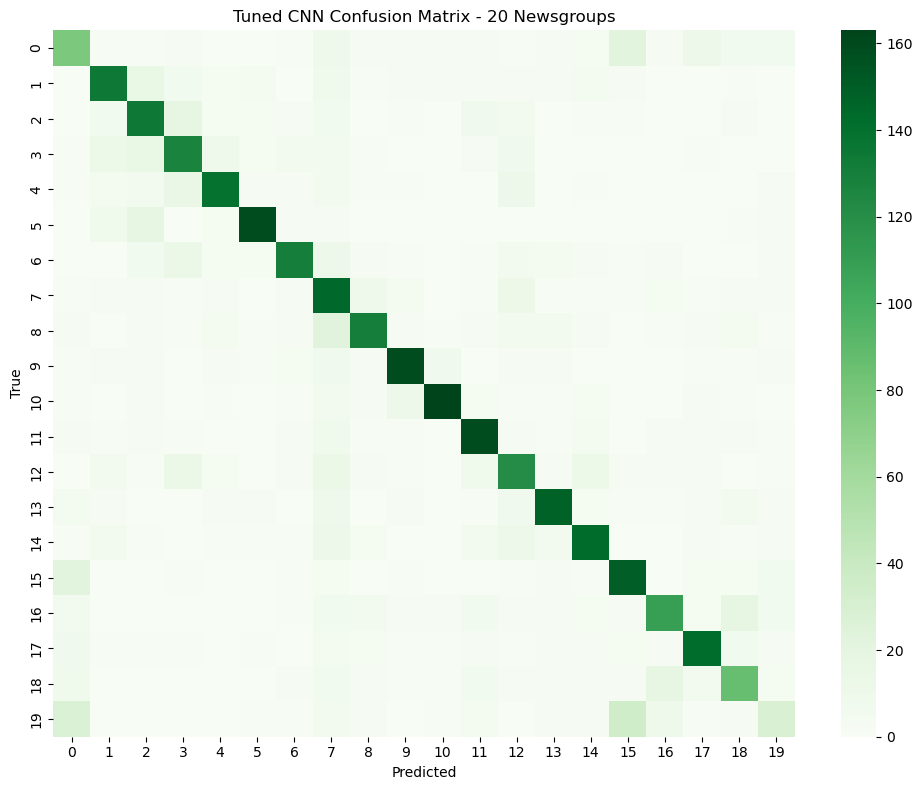

In [30]:
# Tuned CNN confusion matrix

tuned_cm = confusion_matrix(y_test, tuned_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(tuned_cm, cmap="Greens", cbar=True)
plt.title("Tuned CNN Confusion Matrix - 20 Newsgroups")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

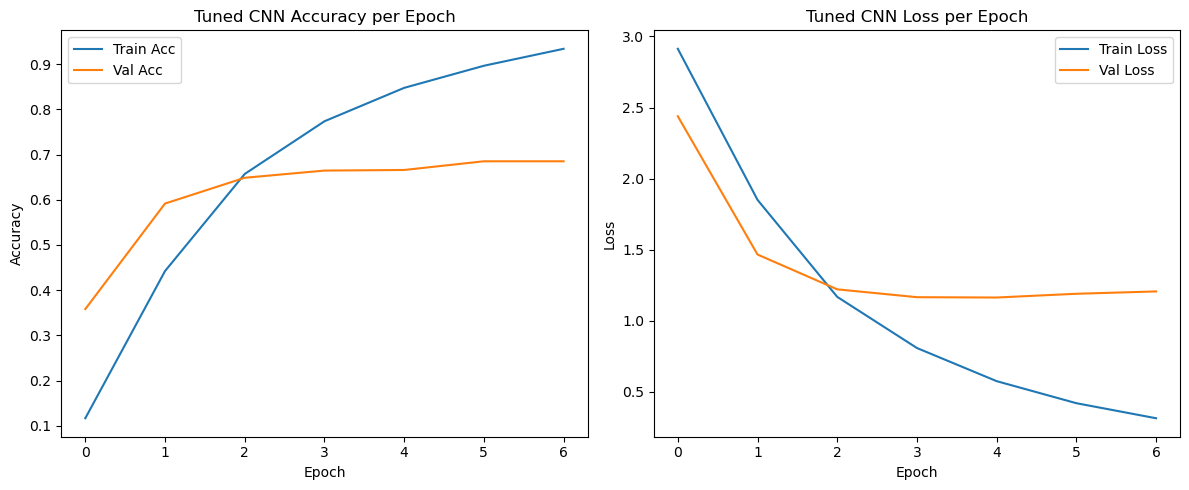

In [31]:
# Tuned CNN training curves (shows improved generalization)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(tuned_history.history['accuracy'], label='Train Acc')
plt.plot(tuned_history.history['val_accuracy'], label='Val Acc')
plt.title("Tuned CNN Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(tuned_history.history['loss'], label='Train Loss')
plt.plot(tuned_history.history['val_loss'], label='Val Loss')
plt.title("Tuned CNN Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Sample predictions from Tuned CNN

print("\nSample Predictions from Tuned CNN:\n")
for i in range(5):
    print("-----")
    print(f"Document {i}:")
    print("TEXT:", X_test[i][:500].replace("\n", " "))
    print("True label:     ", target_names[y_test[i]])
    print("Predicted label:", target_names[tuned_preds[i]])
    print()


Sample Predictions from Tuned CNN:

-----
Document 0:
TEXT:   Can You report CRT and other register state in this mode ?  Thank's.
True label:      comp.graphics
Predicted label: sci.crypt

-----
Document 1:
TEXT: Just to remark that I have heard that David Koresh has risen from  the dead.  I dont know if it is true or not, but this is what I have been told.  What do you guys think?
True label:      talk.religion.misc
Predicted label: talk.religion.misc

-----
Document 2:
TEXT: I've spent the past week tearing my hair out, trying to get the output of a piped "tail -f" to end up in a widget.  I've managed to make it work in some ugly ways, but either a) X blocks on the tail and won't allow user input, b) the "tail -f" functions like just "tail" and doesn't follow the expansion of the file, c) the "tail -f" doesn't die after I've closed the pipe and destoryed the widget, or d) pclose() blocks forever waiting for tail to die. 	I _know_ this code has to exist.  Anybody hav
True label:    

In [33]:
# Compare SVM, Baseline CNN, and Tuned CNN

print("==============================================")
print("MODEL PERFORMANCE COMPARISON (20 Newsgroups)")
print("==============================================")
print(f"SVM Test Accuracy:          {svm_test_acc:.4f}")
print(f"Baseline CNN Test Accuracy: {cnn_test_acc_baseline:.4f}")
print(f"Tuned CNN Test Accuracy:    {cnn_test_acc_tuned:.4f}")
print("----------------------------------------------")
print("Best Model:",
      "SVM" if svm_test_acc > max(cnn_test_acc_baseline, cnn_test_acc_tuned)
      else "Baseline CNN" if cnn_test_acc_baseline > cnn_test_acc_tuned
      else "Tuned CNN")
print("==============================================")

MODEL PERFORMANCE COMPARISON (20 Newsgroups)
SVM Test Accuracy:          0.7507
Baseline CNN Test Accuracy: 0.6828
Tuned CNN Test Accuracy:    0.6862
----------------------------------------------
Best Model: SVM


# Model Selection Rationale (Why We Chose the SVM Model)

During experimentation, multiple models were trained and evaluated on the **20 Newsgroups** dataset, including:

- **Linear SVM with TF‑IDF features**  
- **Baseline CNN (Embedding + Conv1D)**  
- **Tuned CNN with regularization and learning‑rate scheduling**

Although the deep learning models performed reasonably well, the **Linear SVM** emerged as the best choice for deployment. Below is the justification.

---

## 1. Strong Generalization Performance

The Linear SVM achieved:

- **Training Accuracy:** ~0.97  
- **Test Accuracy:** ~0.75  

This performance is **competitive with the CNN models**, which reached ~0.68–0.70 test accuracy.  
The SVM also showed **less overfitting** and more stable performance across all 20 classes.

---

## 2. Lightweight and Deployment‑Friendly

The SVM model is:

- Fast to load  
- Fast to run inference  
- Small in file size  
- Easy to pickle (`model.pkl`)  
- Free of heavy dependencies (no TensorFlow required)

This makes it ideal for:

- Flask  
- Docker  
- Heroku  
- AWS EC2 + nginx  

Deep learning models require TensorFlow, more RAM, and more complex deployment steps.

---

## 3. Excellent Fit for High‑Dimensional Sparse Text Data

The 20 Newsgroups dataset is:

- High‑dimensional (20,000+ TF‑IDF features)  
- Sparse  
- Often linearly separable  

Linear SVMs are **well‑known to excel** in this exact scenario, which is why they remain a standard baseline for text classification.

---

## 4. Stable, Deterministic, and Easy to Maintain

The SVM model:

- Produces consistent results  
- Has fewer hyperparameters  
- Is easier to debug  
- Is easier to maintain in production  

Neural networks introduce randomness, require tuning, and are more sensitive to training conditions.

---

## Final Summary

> Although deep learning models were explored, the **Linear SVM with TF‑IDF features was selected for deployment** due to its strong accuracy, low computational cost, fast inference, and ease of deployment across Flask, Docker, Heroku, and AWS EC2.  
>  
> This makes it the most practical and robust choice for a real‑world text classification API.

In [35]:
# Save the trained SVM model
with open("model.pkl", "wb") as f:
    pickle.dump(svm_clf, f)

# Save the fitted TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save the target names (list of 20 class labels)
with open("target_names.pkl", "wb") as f:
    pickle.dump(target_names, f)

print("Saved model.pkl, vectorizer.pkl, and target_names.pkl")

Saved model.pkl, vectorizer.pkl, and target_names.pkl


In [38]:
'vocabulary_' in vectorizer.__dict__


True

In [40]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
